<a href="https://colab.research.google.com/github/sazzy438/Class_Notes/blob/main/11_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We will modify the linked list structure in a manner that
# allows binary search to be performed

# The first node of our linked list should store the first
# element that binary search checks, i.e., the middle element
# But the second node depends on whether the target is smaller
# or larger than the first node
# To accommodate both possibilities, we allow each node to have
# two .next fields instead of only one
# One for the smaller side (left half) and another for the
# larger side (right half)

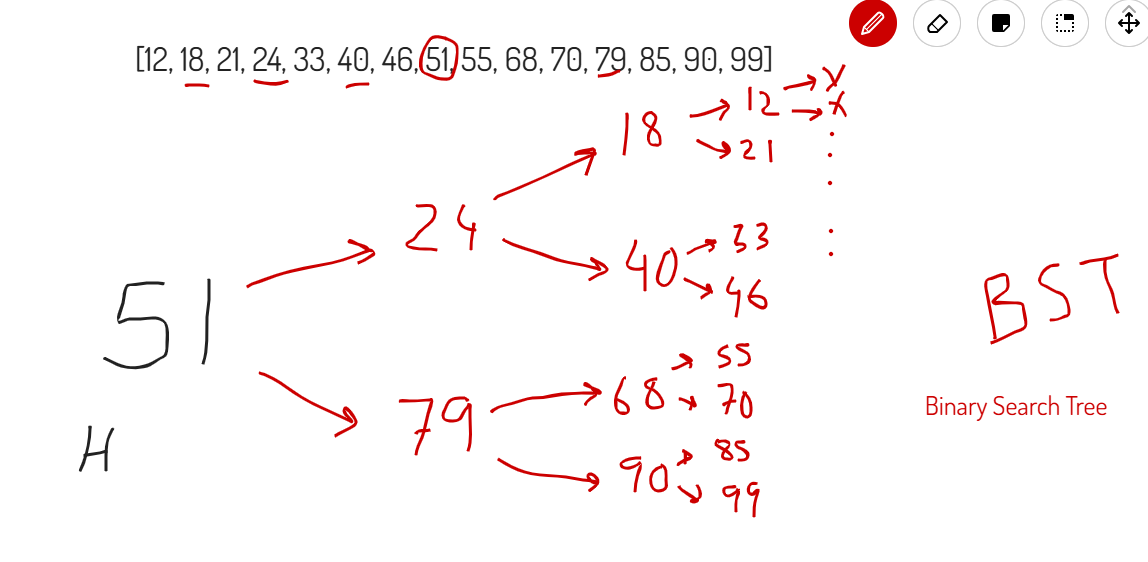

In [ ]:
# This is no longer a linked list structure, as each node can
# have more than one .next fields. This is a tree structure and
# this specific implementation is known as the Binary Search Tree

In [ ]:
class BSTNode:
  def __init__ (self, dt):
    self.data = dt
    self.left = None
    self.right = None

In [ ]:
rt = BSTNode (8)
rt.left = BSTNode (3)
rt.right = BSTNode (10)
rt.left.left = BSTNode (1)
rt.left.right = BSTNode (6)
rt.right.right = BSTNode (14)
rt.left.right.left = BSTNode (4)
rt.left.right.right = BSTNode (7)
rt.right.right.left = BSTNode (13)

In [ ]:
print (rt.left.left.right)    # None
print (rt.left.right.data)    # 6
print (rt.left.right)

None
6


In [ ]:
class BinarySearchTree:
  def __init__ (self):
    self.root = None

  # return True if k is in the BST, or False otherwise
  def search (self, k):
    curr = self.root
    while curr != None:
      if k < curr.data:
        curr = curr.left
      elif k > curr.data:
        curr = curr.right
      else:   # k == curr.data
        return True
    return False

  # add k to the BST
  # assume that k does NOT already exist in the BST
  def insert (self, k):
    if self.root == None:
      self.root = BSTNode (k)
      return

    curr = self.root
    while curr != None:
      if k < curr.data:
        if curr.left == None:
          curr.left = BSTNode (k)
          return
        curr = curr.left

      elif k > curr.data:
        if curr.right == None:
          curr.right = BSTNode (k)
          return
        curr = curr.right

      else:
        print (k, "already exists, yo")
        return

  # You do NOT need to understand either the display or display_aux methods
  def display(self):
    lines, *_ = self._display_aux(self.root)
    for line in lines:
      print(line)

  def _display_aux(self, curr):
    """Returns list of strings, width, height, and horizontal coordinate of the root."""
    # No child.
    if curr.right is None and curr.left is None:
      line = '%s' % curr.data
      width = len(line)
      height = 1
      middle = width // 2
      return [line], width, height, middle

    # Only left child.
    if curr.right is None:
      lines, n, p, x = self._display_aux(curr.left)
      s = '%s' % curr.data
      u = len(s)
      first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
      second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
      shifted_lines = [line + u * ' ' for line in lines]
      return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

    # Only right child.
    if curr.left is None:
      lines, n, p, x = self._display_aux(curr.right)
      s = '%s' % curr.data
      u = len(s)
      first_line = s + x * '_' + (n - x) * ' '
      second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
      shifted_lines = [u * ' ' + line for line in lines]
      return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

    # Two children.
    left, n, p, x = self._display_aux(curr.left)
    right, m, q, y = self._display_aux(curr.right)
    s = '%s' % curr.data
    u = len(s)
    first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
    second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
    if p < q:
      left += [n * ' '] * (q - p)
    elif q < p:
      right += [m * ' '] * (p - q)
    zipped_lines = zip(left, right)
    lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
    return lines, n + m + u, max(p, q) + 2, n + u // 2

In [ ]:
bst = BinarySearchTree ()
bst.insert (8)
bst.insert (3)
bst.insert (10)
bst.insert (1)
bst.insert (6)
bst.insert (14)
bst.insert (4)
bst.insert (7)
bst.insert (13)

print (bst.search (6))    # True
print (bst.search (11))   # False
print (bst.search (1))    # True
print (bst.search (0))    # False
print (bst.search (14))   # True
print (bst.search (15))   # False

print (bst.search (5))    # False
bst.insert (5)
print (bst.search (5))    # True

bst.display ()

bst.insert (8)
bst.insert (10)
bst.insert (5)

True
False
True
False
True
False
False
True
  ____8_     
 /      \    
 3__   10___ 
/   \       \
1  _6      14
  /  \    /  
  4  7   13  
   \         
   5         
8 already exists, yo
10 already exists, yo
5 already exists, yo
